In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch import nn
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.datasets import EmnistDataset, EmnistLinesDataset, Transpose, construct_image_from_string, get_samples_by_character

In [3]:
from text_recognizer.models import LineCTCModel
from text_recognizer.networks import LineRecurrentNetwork

In [4]:
emnist_lines = EmnistLinesDataset(train=False)

2020-09-09 20:38:27.854 | DEBUG    | text_recognizer.datasets.emnist_lines_dataset:_load_data:164 - EmnistLinesDataset loading data from HDF5...


In [5]:
def convert_y_label_to_string(y, emnist_lines=emnist_lines):
    return ''.join([emnist_lines.mapper(int(i)) for i in y])

In [6]:
data, target = emnist_lines[0]

In [7]:
target.shape

torch.Size([34])

In [6]:
network_args = {
          "encoder": "ResidualNetworkEncoder",
          "encoder_args": {
            "in_channels": 1,
            "num_classes": 80,
            "depths": 2,
            "block_sizes": 128,
            "activation": "leaky_relu"},
          "flatten": True,
          "input_size": 128,
          "hidden_size": 128,
          "num_classes": 80,
          "patch_size": [28, 28],
          "stride": [1, 14],}
line_ctc_model = LineCTCModel(LineRecurrentNetwork, EmnistLinesDataset) #, network_args)

2020-09-01 23:37:30.291 | DEBUG    | text_recognizer.models.base:load_weights:405 - Loading network with pretrained weights.


office in Arkansas after the______
in________________________________
by a oneshot technique____________
office Incumbent__________________


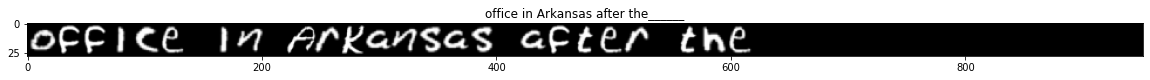

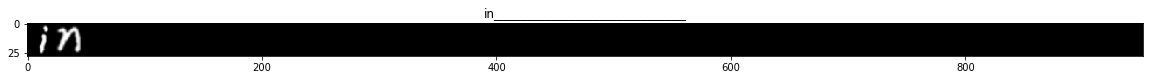

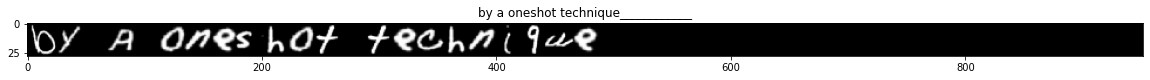

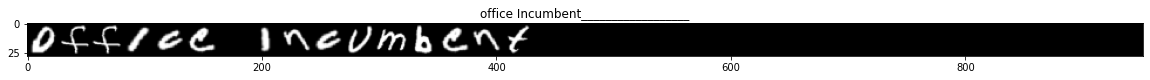

In [7]:
num_samples_to_plot = 4

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    data, target = emnist_lines[i]
    sentence = convert_y_label_to_string(target.numpy()) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0), cmap='gray')

In [20]:
data, target = emnist_lines[3]

office Incumbent__________________


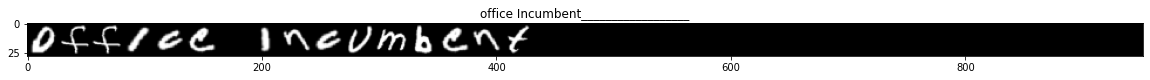

In [21]:
plt.figure(figsize=(20, 20))
sentence = convert_y_label_to_string(target.numpy()) 
print(sentence)
plt.title(sentence)
plt.imshow(data.squeeze(0), cmap='gray')

In [22]:
data = data.to("cuda:0")

In [23]:
line_ctc_model.predict_on_image(data)

('offiee ineumbent', 0.19405342638492584)

In [ ]:
p, _ = line_ctc_model.predict_on_image(data)

In [ ]:
p

In [ ]:
p = line_ctc_model.swa_network(data)

In [ ]:
p.shape

In [ ]:
p, _ = p.max(2)

In [ ]:
torch.exp(p.sum()).item()

In [ ]:
from text_recognizer.models.metrics import cer, wer

In [ ]:
target.unsqueeze(0)

In [ ]:
cer(p, target.unsqueeze(0))

In [ ]:
wer(p, target.unsqueeze(0))